# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [1]:
#!python -m pip install kaggle==1.6.12

In [2]:
#!pip install --target=/workspace ucimlrepo numpy==1.24.3

**Note:** Restart the kernel to use updated package(s).

---

### Optional: Programmatic data gathering (Kaggle API)
If you want to demonstrate a second gathering method, you can use the Kaggle API to download the same datasets programmatically. Save your `kaggle.json` (API token) in the environment (e.g., `~/.kaggle/kaggle.json`) and run the commands below in a code cell or terminal. Replace `<owner/dataset>` with the dataset slug from Kaggle.

```bash
# example: download the Movies dataset
# kaggle datasets download -d rounakbanik/the-movies-dataset -f movies_metadata.csv -p ./data --unzip
# example: download the Netflix dataset
# kaggle datasets download -d shivamb/netflix-shows -f netflix_titles.csv -p ./data --unzip
```

If you run these commands in the notebook, show the code cell used so the grader can reproduce the programmatic gathering method.

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
 I will investigate how movie attributes (budget, revenue, runtime, and genre) relate to availability and presentation on Netflix. Using the movies_metadata.csv dataset (detailed movie-level metadata) and the netflix_titles.csv dataset (Netflix availability, type, country, and duration), I will wrangle and combine these sources to compare content characteristics and streaming presence. The wrangling steps will include coercing numeric/date fields, normalizing nested JSON-like columns (e.g., genres), splitting mixed-unit fields (e.g., duration into value and unit), and merging on normalized titles and years for analysis.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV ([movies_metadata.csv](movies_metadata.csv))(e.g., CSV File.)

Method: downloaded manually and saved as raw_movies.csv; file link included in DATA_SOURCES.txt (e.g., The data was gathered using the "Downloading files" method from X source.)

Dataset variables:

*   `title`, `budget`, `revenue`, `runtime`, `genres`, `release_date`. These enable revenue/runtime comparisons and genre-level analysis.

In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Prefer downloaded file in ./data if present (from Kaggle cell), otherwise fallback to repo root file
DATA_DIR = Path('.')
downloaded = Path('data') / 'movies_metadata.csv'
movies_path = downloaded if downloaded.exists() else (DATA_DIR / 'movies_metadata.csv')

if not movies_path.exists():
    raise FileNotFoundError(
        f"movies_metadata.csv not found in ./data or repo root "
        f"(looked for {downloaded} and {DATA_DIR / 'movies_metadata.csv'}). "
        "Please run the Kaggle download cell or place the file at ./data/movies_metadata.csv"
    )

print(f"Loaded movies from: {movies_path}")
movies_df = pd.read_csv(movies_path)

Loaded movies from: data\movies_metadata.csv


c:\Users\86bur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Programmatic gather: download movies_metadata.csv using the Kaggle CLI (rounakbanik/the-movies-dataset)
# Make sure you have your kaggle.json in ~/.kaggle/kaggle.json or the environment where the notebook runs.
# This cell only downloads the movies dataset; the existing netflix_titles.csv is left untouched.
from pathlib import Path
import subprocess, sys
data_dir = Path('data')
data_dir.mkdir(exist_ok=True)
target = data_dir / 'movies_metadata.csv'
if target.exists():
    print(f'{target} already exists — skipping download.')
else:
    print('Downloading movies_metadata.csv from Kaggle into ./data — this requires kaggle CLI and a valid kaggle.json token in ~/.kaggle/')
    try:
        # run kaggle CLI to download and unzip the single file into ./data
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--quiet', 'kaggle'])
        # invoke kaggle (requires that ~/.kaggle/kaggle.json is present and permissions set to 600)
        subprocess.check_call(['kaggle', 'datasets', 'download', '-d', 'rounakbanik/the-movies-dataset', '-f', 'movies_metadata.csv', '-p', str(data_dir), '--unzip'])
        print('Download complete.')
    except subprocess.CalledProcessError as e:
        print('Error running kaggle CLI:', e)
        print('If running in a locked environment, place the file manually in ./data/movies_metadata.csv')

data\movies_metadata.csv already exists — skipping download.


In [5]:
display(movies_df.head())

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


#### Dataset 2

Type: CSV ([netflix_titles.csv](netflix_titles.csv)) (e.g., CSV File.)

Method: downloaded manually and saved as raw_netflix.csv (see DATA_SOURCES.txt). Could also be obtained with the Kaggle API (snippet provided below). (e.g., The data was gathered using the "API" method from Y source.)

Dataset variables:

*   `title`, `type`, `country`, `date_added`, `release_year`, `duration`. These enable matching availability and duration/unit comparisons

In [6]:
with open('DATA_SOURCES.txt','w', encoding='utf-8') as f:
    f.write("movies_metadata.csv — source: https://www.kaggle.com/rounakbanik/the-movies-dataset\n")
    f.write("netflix_titles.csv — source: https://www.kaggle.com/shivamb/netflix-shows\n")
print("Wrote DATA_SOURCES.txt with dataset source links.")

Wrote DATA_SOURCES.txt with dataset source links.


In [7]:
netflix_path = DATA_DIR / 'netflix_titles.csv'
netflix_df = pd.read_csv(netflix_path)

print(f"movies file exists: {movies_path.exists()}, netflix file exists: {netflix_path.exists()}")


movies file exists: True, netflix file exists: True


In [8]:
display(netflix_df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [9]:
#Optional: store the raw data in your local data store
movies_df.to_csv('raw_movies.csv', index=False)
netflix_df.to_csv('raw_netflix.csv', index=False)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [10]:
# Visual inspection of movies_df
print('movies_df shape:', movies_df.shape)
movies_df.info()
movies_df.head(10)


movies_df shape: (45466, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [11]:
movies_df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


Issue and justification:

Quality Issue 1 — Numeric and date fields contain invalid or inconsistent values.

Visual assessment: Inspecting `movies_df.head()` and random samples shows that financial and numeric columns such as `budget`, `revenue`, and `runtime` often contain values of `'0'`, empty strings, or non-numeric text. The `release_date` column appears in mixed formats and some rows are missing a value. The `genres` column contains JSON-like strings rather than a normalized categorical field. These observations were made using the head(), sample(), and by displaying example values for the candidate columns.

Programmatic assessment: When coercing `budget`, `revenue`, and `runtime` to numeric with `pd.to_numeric(..., errors='coerce')` a large number of entries convert to NaN, and many entries equal 0. Parsing `release_date` with `pd.to_datetime(..., errors='coerce')` yields numerous NaT values. Counting nulls and applying `isnull().sum()` confirms these issues quantitatively.

Justification: For accurate analysis we require true numeric dtypes for budget/revenue/runtime and proper datetime types for temporal analyses. String-encoded lists (e.g., `genres`) violate the tidy-data principle and should be normalized. Cleaning should: (1) coerce numeric columns to numeric and investigate/fix or impute zeros/NaNs, (2) parse and standardize `release_date`, and (3) normalize nested/list columns (e.g., parse JSON-like `genres` and explode).

### Quality Issue 2:

In [12]:
# Visual inspection of netflix_df
print("=== QUALITY ISSUE 2 (netflix_df): MISSING / INCONSISTENT 'country' and mixed 'type' values ===")
print("Shape:", netflix_df.shape)
display(netflix_df.head(8))
print("\nMissing counts (top):")
print(netflix_df.isnull().sum().sort_values(ascending=False).head(10))



=== QUALITY ISSUE 2 (netflix_df): MISSING / INCONSISTENT 'country' and mixed 'type' values ===
Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."



Missing counts (top):
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
dtype: int64


In [13]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
# Programmatic checks
if 'country' in netflix_df.columns:
    missing_country = int(netflix_df['country'].isna().sum())
    unique_countries = netflix_df['country'].dropna().nunique()
    print(f"\nnetflix_df: missing country = {missing_country}, unique non-null countries = {unique_countries}")

# Duplicate check (uniqueness pillar)
if {'title', 'release_year'}.issubset(netflix_df.columns):
    dup_pairs = netflix_df.duplicated(subset=['title', 'release_year'], keep=False).sum()
    print(f"netflix_df duplicate (title, release_year) rows: {dup_pairs}")
else:
    dup_titles = netflix_df['title'].duplicated(keep=False).sum() if 'title' in netflix_df.columns else 0
    print(f"netflix_df duplicate titles: {dup_titles}")


netflix_df: missing country = 831, unique non-null countries = 748
netflix_df duplicate (title, release_year) rows: 0


Issue and justification: MISSING / INCONSISTENT 'country' and mixed 'type' values

### Tidiness Issue 1:

In [15]:
#  Tidiness Issue 1 (movies_df nested columns) — Visual + Programmatic assessment
print("\n\n=== TIDINESS ISSUE 1 (movies_df): nested/JSON-like columns (genres, production_companies, etc.) ===")
nested_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'belongs_to_collection']
for col in nested_cols:
    if col in movies_df.columns:
        sample_nonnull = movies_df[col].dropna().astype(str)
        print(f"\nColumn: {col} — sample (up to 5):")
        display(sample_nonnull.sample(min(5, sample_nonnull.shape[0]), random_state=1))
        json_like_count = int(movies_df[col].astype(str).str.contains(r'[\{\[\]]|\"name\"', na=False).sum())
        print(f"Rows with JSON-like markers in '{col}': {json_like_count} / {len(movies_df)}")




=== TIDINESS ISSUE 1 (movies_df): nested/JSON-like columns (genres, production_companies, etc.) ===

Column: genres — sample (up to 5):


30160                       [{'id': 35, 'name': 'Comedy'}]
26084    [{'id': 10749, 'name': 'Romance'}, {'id': 80, ...
37928    [{'id': 878, 'name': 'Science Fiction'}, {'id'...
929      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
7366     [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...
Name: genres, dtype: object

Rows with JSON-like markers in 'genres': 45466 / 45466

Column: production_companies — sample (up to 5):


20588    [{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...
4676     [{'name': 'Filmové Studio Barrandov', 'id': 19...
25008    [{'name': 'La Petite Reine', 'id': 1992}, {'na...
11588             [{'name': 'MPI Home Video', 'id': 5463}]
7030     [{'name': 'Frankovich Productions', 'id': 2102...
Name: production_companies, dtype: object

Rows with JSON-like markers in 'production_companies': 45460 / 45466

Column: production_countries — sample (up to 5):


20588    [{'iso_3166_1': 'US', 'name': 'United States o...
4676     [{'iso_3166_1': 'CZ', 'name': 'Czech Republic'...
25008             [{'iso_3166_1': 'FR', 'name': 'France'}]
11588     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
7030      [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, dtype: object

Rows with JSON-like markers in 'production_countries': 45460 / 45466

Column: spoken_languages — sample (up to 5):


30684    [{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...
4676     [{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...
25008            [{'iso_639_1': 'fr', 'name': 'Français'}]
12647    [{'iso_639_1': 'zu', 'name': 'isiZulu'}, {'iso...
7030     [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
Name: spoken_languages, dtype: object

Rows with JSON-like markers in 'spoken_languages': 45460 / 45466

Column: belongs_to_collection — sample (up to 5):


32897    {'id': 32153, 'name': 'Fallen Collection', 'po...
16511    {'id': 297143, 'name': 'Dexter Riley Collectio...
405      {'id': 11716, 'name': 'Addams Family Collectio...
309      {'id': 144200, 'name': 'Swan Princess Series',...
10702    {'id': 86578, 'name': 'Hostel Collection', 'po...
Name: belongs_to_collection, dtype: object

Rows with JSON-like markers in 'belongs_to_collection': 4491 / 45466


Issue and justification: nested/JSON-like columns (genres, production_companies, etc.)

### Tidiness Issue 2: 

In [16]:
#Tidiness Issue 2 (netflix_df duration mixing) — Visual + Programmatic assessment
print("\n\n=== TIDINESS ISSUE 2 (netflix_df): 'duration' mixes minutes and seasons ===")
if 'duration' in netflix_df.columns:
    display(netflix_df['duration'].dropna().astype(str).sample(min(10, netflix_df['duration'].dropna().shape[0]), random_state=1))
    dur = netflix_df['duration'].astype(str)
    minutes_count = int(dur.str.contains(r'\bmin\b', case=False, na=False).sum())
    seasons_count = int(dur.str.contains(r'\bSeason\b|\bSeasons\b', case=False, na=False).sum())
    other_count = len(netflix_df) - minutes_count - seasons_count - int(netflix_df['duration'].isna().sum())
    print(f"duration counts -> minutes: {minutes_count}, seasons: {seasons_count}, other: {other_count}, total: {len(netflix_df)}")



=== TIDINESS ISSUE 2 (netflix_df): 'duration' mixes minutes and seasons ===


4080       61 min
7387      192 min
3080       90 min
825     2 Seasons
331      1 Season
6672     1 Season
2600    5 Seasons
3207      106 min
5377      108 min
372       138 min
Name: duration, dtype: object

duration counts -> minutes: 6128, seasons: 2676, other: 0, total: 8807


Issue and justification: 'duration' mixes minutes and seasons

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [17]:
# Make copies of the datasets to ensure the raw dataframes are preserved
# Import parsing helpers and numpy utilities
import ast
import numpy as np

### **Quality Issue 1:Numeric and date fields (budget, revenue, runtime, release_date)

In [18]:
# Apply the cleaning strategy for numeric and date fields
# Coerce to numeric where appropriate and handle common missing-value encodings
movies_clean = movies_df.copy()

for col in ['budget', 'revenue', 'runtime']:
    if col in movies_clean.columns:
        # remove common non-numeric characters then coerce
        movies_clean[col] = movies_clean[col].astype(str).str.replace(r'[,$]', '', regex=True).replace({'': np.nan}).astype(object)
        movies_clean[col] = pd.to_numeric(movies_clean[col], errors='coerce')
        # treat zeros as missing for budget/revenue since many zeros indicate missing data
        if col in ['budget', 'revenue']:
            movies_clean.loc[movies_clean[col] == 0, col] = np.nan

if 'release_date' in movies_clean.columns:
    movies_clean['release_date_parsed'] = pd.to_datetime(movies_clean['release_date'], errors='coerce', infer_datetime_format=True)
    movies_clean['release_year_parsed'] = movies_clean['release_date_parsed'].dt.year

print("\nmovies_clean numeric parse summary:")
for col in ['budget', 'revenue', 'runtime']:
    if col in movies_clean.columns:
        s = movies_clean[col]
        print(f"{col}: total={len(s)}, non-null={s.notna().sum()}, NaN={s.isna().sum()}")


movies_clean numeric parse summary:
budget: total=45466, non-null=8890, NaN=36576
revenue: total=45466, non-null=7408, NaN=38058
runtime: total=45466, non-null=45203, NaN=263


In [19]:
# Validate the cleaning was successful for movies numeric/date parsing and genres explosion
print("\n=== MOVIES_CLEAN VALIDATION ===")
for col in ['budget', 'revenue', 'runtime']:
    if col in movies_clean.columns:
        s = movies_clean[col]
        print(f"{col}: total={len(s)}, non-null={s.notna().sum()}, NaN={s.isna().sum()}")

if 'release_date_parsed' in movies_clean.columns:
    print("release_date_parsed unparsable (NaT) count:", int(movies_clean['release_date_parsed'].isna().sum()))
    display(movies_clean[['title','release_date','release_date_parsed']].sample(5, random_state=1))

# Validate exploded genres
if 'movies_genres' in globals() and movies_genres is not None:
    print("\nmovies_genres rows:", len(movies_genres))
    print("unique genres:", movies_genres['genre'].nunique())
    display(movies_genres[['id','title','genre']].drop_duplicates().head())
else:
    print("\nmovies_genres not created or empty - ensure genres parsing step ran successfully.")


=== MOVIES_CLEAN VALIDATION ===
budget: total=45466, non-null=8890, NaN=36576
revenue: total=45466, non-null=7408, NaN=38058
runtime: total=45466, non-null=45203, NaN=263
release_date_parsed unparsable (NaT) count: 90


,title,release_date,release_date_parsed
30160,The New Comics,1994-01-01,1994-01-01
26084,China Girl,1987-09-25,1987-09-25
37928,Snow Shark: Ancient Snow Beast,2011-10-12,2011-10-12
929,Penny Serenade,1941-04-24,1941-04-24
7366,Iron And Silk,1991-02-15,1991-02-15



movies_genres not created or empty - ensure genres parsing step ran successfully.


In [20]:
movies_genres = None
if 'genres' in movies_clean.columns:
    def safe_parse_genres(x):
        try:
            if pd.isna(x) or x == '[]' or str(x).strip() == '':
                return []
            # some entries are already lists in correct repr, others are string; use ast.literal_eval safe
            parsed = ast.literal_eval(x) if isinstance(x, str) else x
            # parsed is list of dicts; extract 'name' when possible
            names = []
            if isinstance(parsed, list):
                for item in parsed:
                    if isinstance(item, dict):
                        if 'name' in item:
                            names.append(item['name'])
                        elif 'iso_3166_1' in item and 'name' in item:
                            names.append(item.get('name'))
                    elif isinstance(item, str):
                        names.append(item)
            return names
        except Exception:
            # fallback: try to extract quoted names using simple regex
            try:
                import re
                return re.findall(r"'name':\s*'([^']+)'|\"name\":\s*\"([^\"]+)\"", str(x))
            except Exception:
                return []

    movies_clean['genres_list'] = movies_clean['genres'].apply(safe_parse_genres) if 'genres' in movies_clean.columns else [[]]*len(movies_clean)
    # explode
    movies_genres = movies_clean[['id', 'title', 'genres_list']].explode('genres_list').rename(columns={'genres_list': 'genre'})
    # drop rows with empty genre
    movies_genres = movies_genres[movies_genres['genre'].notna() & (movies_genres['genre'] != '')]

print("\nExploded genres sample:")
if movies_genres is not None:
    display(movies_genres.head())


Exploded genres sample:


,id,title,genre
0,862,Toy Story,Animation
0,862,Toy Story,Comedy
0,862,Toy Story,Family
1,8844,Jumanji,Adventure
1,8844,Jumanji,Fantasy


Cleaning summary and justification:
  - Coerced `budget`, `revenue`, and `runtime` to numeric using `pd.to_numeric(..., errors='coerce')` to enforce valid numeric types for analysis. Many entries were strings, empty, or zero; numeric dtype enables correct aggregations and comparisons.
  - Treated `0` in `budget` and `revenue` as missing (`NaN`) because many rows use `0` to indicate missing financial data; this prevents bias in summary statistics and visualizations.
  - Parsed `release_date` with `pd.to_datetime(..., errors='coerce')` and created `release_year_parsed` for reliable temporal grouping.
  

### **Quality Issue 2: Netflix metadata (duration and country completeness)

In [21]:
# Apply the cleaning strategy for Netflix duration and country
netflix_clean = netflix_df.copy()
if 'duration' in netflix_clean.columns:
    netflix_clean['duration'] = netflix_clean['duration'].astype(str)
    netflix_clean['duration_value'] = netflix_clean['duration'].str.extract(r'(\d+)').astype(float)
    netflix_clean['duration_unit'] = netflix_clean['duration'].str.replace(r'^\s*\d+\s*', '', regex=True).str.strip()
    # normalize unit values
    netflix_clean['duration_unit'] = netflix_clean['duration_unit'].replace({'min': 'min', 'mins': 'min', 'Season': 'season', 'Seasons':'season'}).str.lower()

print("\nnetflix_clean duration split sample:")
if 'duration_value' in netflix_clean.columns:
    display(netflix_clean[['title','duration','duration_value','duration_unit']].head(8))


netflix_clean duration split sample:


,title,duration,duration_value,duration_unit
0,Dick Johnson Is Dead,90 min,90.0,min
1,Blood & Water,2 Seasons,2.0,season
2,Ganglands,1 Season,1.0,season
3,Jailbirds New Orleans,1 Season,1.0,season
4,Kota Factory,2 Seasons,2.0,season
5,Midnight Mass,1 Season,1.0,season
6,My Little Pony: A New Generation,91 min,91.0,min
7,Sankofa,125 min,125.0,min


In [22]:
# Validate the cleaning was successful for Netflix duration parsing and country handling
print("\n=== NETFLIX_CLEAN VALIDATION ===")
if 'duration_value' in netflix_clean.columns and 'duration_unit' in netflix_clean.columns:
    print("duration_value non-null:", netflix_clean['duration_value'].notna().sum())
    print("duration_unit value counts:")
    print(netflix_clean['duration_unit'].value_counts(dropna=False).head(20))

# Country split validation
if 'country' in netflix_clean.columns:
    missing_country = int(netflix_clean['country'].isna().sum())
    multi_country = int(netflix_clean['country'].dropna().str.contains(',').sum())
    print(f"country missing: {missing_country}, rows with multiple countries: {multi_country}")
    # create primary country column if not present
    if 'country_primary' not in netflix_clean.columns:
        netflix_clean['country_primary'] = netflix_clean['country'].fillna('').str.split(',', expand=True)[0].str.strip().replace('', pd.NA)
    print("Sample country_primary values:")
    display(netflix_clean[['title','country','country_primary']].drop_duplicates().head(8))


=== NETFLIX_CLEAN VALIDATION ===
duration_value non-null: 8804
duration_unit value counts:
min       6128
season    2676
nan          3
Name: duration_unit, dtype: int64
country missing: 831, rows with multiple countries: 1320
Sample country_primary values:


,title,country,country_primary
0,Dick Johnson Is Dead,United States,United States
1,Blood & Water,South Africa,South Africa
2,Ganglands,NaN,<NA>
3,Jailbirds New Orleans,NaN,<NA>
4,Kota Factory,India,India
5,Midnight Mass,NaN,<NA>
6,My Little Pony: A New Generation,NaN,<NA>
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",United States


Cleaning summary and justification:
  - `duration`: split into `duration_value` (numeric) and `duration_unit` (string). This converts mixed-format entries like \"90 min\" and \"2 Seasons\" into tidy fields, enabling numeric comparisons and separate handling of movies vs TV shows.
  - `country`: many entries are missing or contain comma-separated lists. For completeness, we split multiple countries into lists and add a `country_primary` (first listed) for analyses that need a single country. Missing values are left `NaN` and flagged for potential enrichment.
  Validation approach:
  - Programmatic: report counts of `duration_unit` categories (e.g., 'min', 'season') and count missing `country` entries before/after splitting. These numbers quantify the remaining issues.
  - Visual: sample cleaned `duration_value`/`duration_unit` rows to confirm parsing correctness.

### **Tidiness Issue 1: Nested JSON-like columns (movies_df)

In [23]:
# Apply cleaning for nested JSON-like columns and create exploded tables
# Preserve originals in memory (safe raw copies)
movies_raw = movies_df.copy() if 'movies_df' in globals() else None
netflix_raw = netflix_df.copy() if 'netflix_df' in globals() else None

# Work copies used for cleaning (so raw_* variables remain untouched)
movies_clean = movies_raw.copy() if movies_raw is not None else pd.DataFrame()
netflix_clean = netflix_raw.copy() if netflix_raw is not None else pd.DataFrame()

In [24]:
# Validate numeric/date coercion and parsing after general cleaning
# Coerce numeric fields, normalize currency-like strings, parse dates, and flag missing values.
for col in ['budget', 'revenue', 'runtime']:
    if col in movies_clean.columns:
        # Remove common non-numeric characters (commas, dollar signs, whitespace)
        # Convert empty strings to NaN first
        movies_clean[col] = movies_clean[col].replace(r'^\s*$', np.nan, regex=True)
        # If column is object/string, remove commas and dollar signs before coercion
        if movies_clean[col].dtype == object:
            movies_clean[col] = movies_clean[col].astype(str).str.replace(r'[,\$]', '', regex=True).str.strip()
            movies_clean[col] = movies_clean[col].replace({'': np.nan})
        movies_clean[col] = pd.to_numeric(movies_clean[col], errors='coerce')

        # Treat zeros as missing for budget/revenue because dataset uses 0 to encode missing finance
        if col in ['budget', 'revenue']:
            movies_clean.loc[movies_clean[col] == 0, col] = np.nan

# Parse release_date robustly and extract year
if 'release_date' in movies_clean.columns:
    movies_clean['release_date_parsed'] = pd.to_datetime(movies_clean['release_date'], errors='coerce', infer_datetime_format=True)
    # fallback: if parsing failed but a year column exists, preserve it
    movies_clean['release_year_parsed'] = movies_clean['release_date_parsed'].dt.year
    if 'release_year' in movies_clean.columns and movies_clean['release_year_parsed'].isna().any():
        # fill missing parsed year with numeric release_year if available
        movies_clean['release_year_parsed'] = movies_clean['release_year_parsed'].fillna(pd.to_numeric(movies_clean['release_year'], errors='coerce'))

# Quick summary print for validation
print("\nmovies_clean numeric + date summary:")
for col in ['budget', 'revenue', 'runtime']:
    if col in movies_clean.columns:
        s = movies_clean[col]
        print(f"{col}: total={len(s)}, non-null={int(s.notna().sum())}, NaN={int(s.isna().sum())}")
if 'release_date_parsed' in movies_clean.columns:
    print("release_date_parsed NaT count:", int(movies_clean['release_date_parsed'].isna().sum()))


movies_clean numeric + date summary:
budget: total=45466, non-null=8890, NaN=36576
revenue: total=45466, non-null=7408, NaN=38058
runtime: total=45466, non-null=45203, NaN=263
release_date_parsed NaT count: 90


Justification: - The `genres` and similar columns store structured data (lists of dicts) as strings. To satisfy tidy rules, these were parsed and normalized into a separate long table `movies_genres` where each row is one movie–genre observation.
  - This normalized structure supports grouping, counting, and merging on genre without complex string parsing later
  

### **Tidiness Issue 2: Duration mixing in netflix_df

In [25]:
# Apply the cleaning strategy for nested columns (general parser + explode steps)
# Reuse a safe parser used for genres, generalize for other nested columns.
def safe_parse_list_of_dicts(x):
    """Return list of dict-like items or strings from a string representation, safe fallback to []."""
    try:
        if pd.isna(x) or x == '[]' or str(x).strip() == '':
            return []
        parsed = ast.literal_eval(x) if isinstance(x, str) else x
        # If parsed is a dict (e.g., belongs_to_collection), wrap in list
        if isinstance(parsed, dict):
            return [parsed]
        if isinstance(parsed, list):
            return parsed
        return []
    except Exception:
        # fallback simple heuristics: attempt to extract "name" values via regex
        import re
        finds = re.findall(r'"name"\s*:\s*"([^"]+)"|\'name\'\s*:\s*\'([^\']+)\'', str(x))
        # regex returns tuples; extract non-empty entries
        names = []
        for t in finds:
            names.append(t[0] or t[1])
        return [{'name': n} for n in names] if names else []

# Parse and explode common nested columns into separate long tables
movies_genres = None
movies_prod_companies = None
movies_prod_countries = None
movies_spoken_languages = None
movies_collection = None

# GENRES (if not already created)
if 'genres' in movies_clean.columns:
    movies_clean['genres_list'] = movies_clean['genres'].apply(safe_parse_list_of_dicts)
    movies_genres = movies_clean[['id', 'title', 'genres_list']].explode('genres_list').copy()
    # If exploded item is dict, extract 'name', else if string keep as is
    movies_genres['genre'] = movies_genres['genres_list'].apply(lambda v: v.get('name') if isinstance(v, dict) and 'name' in v else (v if isinstance(v, str) else None))
    movies_genres = movies_genres[['id', 'title', 'genre']].dropna(subset=['genre']).drop_duplicates().reset_index(drop=True)

# PRODUCTION COMPANIES
if 'production_companies' in movies_clean.columns:
    movies_clean['prod_companies_list'] = movies_clean['production_companies'].apply(safe_parse_list_of_dicts)
    movies_prod_companies = movies_clean[['id', 'title', 'prod_companies_list']].explode('prod_companies_list').copy()
    movies_prod_companies['company'] = movies_prod_companies['prod_companies_list'].apply(lambda v: v.get('name') if isinstance(v, dict) and 'name' in v else (v if isinstance(v, str) else None))
    movies_prod_companies = movies_prod_companies[['id','title','company']].dropna(subset=['company']).drop_duplicates().reset_index(drop=True)

# PRODUCTION COUNTRIES
if 'production_countries' in movies_clean.columns:
    movies_clean['prod_countries_list'] = movies_clean['production_countries'].apply(safe_parse_list_of_dicts)
    movies_prod_countries = movies_clean[['id','title','prod_countries_list']].explode('prod_countries_list').copy()
    movies_prod_countries['country'] = movies_prod_countries['prod_countries_list'].apply(lambda v: v.get('name') if isinstance(v, dict) and 'name' in v else (v if isinstance(v, str) else None))
    movies_prod_countries = movies_prod_countries[['id','title','country']].dropna(subset=['country']).drop_duplicates().reset_index(drop=True)

# SPOKEN LANGUAGES
if 'spoken_languages' in movies_clean.columns:
    movies_clean['spoken_languages_list'] = movies_clean['spoken_languages'].apply(safe_parse_list_of_dicts)
    movies_spoken_languages = movies_clean[['id','title','spoken_languages_list']].explode('spoken_languages_list').copy()
    movies_spoken_languages['spoken_language'] = movies_spoken_languages['spoken_languages_list'].apply(lambda v: v.get('name') if isinstance(v, dict) and 'name' in v else (v if isinstance(v, str) else None))
    movies_spoken_languages = movies_spoken_languages[['id','title','spoken_language']].dropna(subset=['spoken_language']).drop_duplicates().reset_index(drop=True)

# BELONGS TO COLLECTION (single dict)
if 'belongs_to_collection' in movies_clean.columns:
    movies_clean['collection_obj'] = movies_clean['belongs_to_collection'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() not in ['','[]'] else (x if isinstance(x, dict) else None))
    movies_collection = movies_clean[['id','title','collection_obj']].copy()
    movies_collection['collection_name'] = movies_collection['collection_obj'].apply(lambda v: v.get('name') if isinstance(v, dict) and 'name' in v else None)
    movies_collection = movies_collection[['id','title','collection_name']].dropna(subset=['collection_name']).drop_duplicates().reset_index(drop=True)

print("\nExploded nested columns (counts):")
if movies_genres is not None:
    print("movies_genres rows:", len(movies_genres))
if movies_prod_companies is not None:
    print("movies_prod_companies rows:", len(movies_prod_companies))
if movies_prod_countries is not None:
    print("movies_prod_countries rows:", len(movies_prod_countries))
if movies_spoken_languages is not None:
    print("movies_spoken_languages rows:", len(movies_spoken_languages))
if movies_collection is not None:
    print("movies_collection rows:", len(movies_collection))


Exploded nested columns (counts):
movies_genres rows: 91027
movies_prod_companies rows: 70462
movies_prod_countries rows: 49367
movies_spoken_languages rows: 53252
movies_collection rows: 4488


In [26]:
# Validate nested-columns parsing and exploded tables
print("\n=== VALIDATION: Nested-columns parsing ===")

# Validate genres
if 'movies_genres' in globals() and movies_genres is not None:
    print("movies_genres: rows =", len(movies_genres), ", unique genres =", movies_genres['genre'].nunique())
    display(movies_genres[['id','title','genre']].drop_duplicates().head(8))
else:
    print("movies_genres not found or empty")

# Validate production companies
if 'movies_prod_companies' in globals() and movies_prod_companies is not None:
    print("movies_prod_companies: rows =", len(movies_prod_companies))
    display(movies_prod_companies[['id','title','company']].drop_duplicates().head(8))
else:
    print("movies_prod_companies not found or empty")

# Validate production countries
if 'movies_prod_countries' in globals() and movies_prod_countries is not None:
    print("movies_prod_countries: rows =", len(movies_prod_countries))
    display(movies_prod_countries[['id','title','country']].drop_duplicates().head(8))
else:
    print("movies_prod_countries not found or empty")

# Validate spoken languages
if 'movies_spoken_languages' in globals() and movies_spoken_languages is not None:
    print("movies_spoken_languages: rows =", len(movies_spoken_languages))
    display(movies_spoken_languages[['id','title','spoken_language']].drop_duplicates().head(8))
else:
    print("movies_spoken_languages not found or empty")

# Validate collection
if 'movies_collection' in globals() and movies_collection is not None:
    print("movies_collection: rows =", len(movies_collection))
    display(movies_collection[['id','title','collection_name']].drop_duplicates().head(8))
else:
    print("movies_collection not found or empty")

# Sanity check: ensure movies_genres and movies_clean align on movie ids
if 'movies_genres' in globals() and movies_genres is not None and not movies_genres.empty:
    missing_ids = set(movies_genres['id'].unique()) - set(movies_clean['id'].unique())
    print("ids in movies_genres but not in movies_clean (should be empty):", list(missing_ids)[:5])


=== VALIDATION: Nested-columns parsing ===
movies_genres: rows = 91027 , unique genres = 32


,id,title,genre
0,862,Toy Story,Animation
1,862,Toy Story,Comedy
2,862,Toy Story,Family
3,8844,Jumanji,Adventure
4,8844,Jumanji,Fantasy
5,8844,Jumanji,Family
6,15602,Grumpier Old Men,Romance
7,15602,Grumpier Old Men,Comedy


movies_prod_companies: rows = 70462


,id,title,company
0,862,Toy Story,Pixar Animation Studios
1,8844,Jumanji,TriStar Pictures
2,8844,Jumanji,Teitler Film
3,8844,Jumanji,Interscope Communications
4,15602,Grumpier Old Men,Warner Bros.
5,15602,Grumpier Old Men,Lancaster Gate
6,31357,Waiting to Exhale,Twentieth Century Fox Film Corporation
7,11862,Father of the Bride Part II,Sandollar Productions


movies_prod_countries: rows = 49367


,id,title,country
0,862,Toy Story,United States of America
1,8844,Jumanji,United States of America
2,15602,Grumpier Old Men,United States of America
3,31357,Waiting to Exhale,United States of America
4,11862,Father of the Bride Part II,United States of America
5,949,Heat,United States of America
6,11860,Sabrina,Germany
7,11860,Sabrina,United States of America


movies_spoken_languages: rows = 53252


,id,title,spoken_language
0,862,Toy Story,English
1,8844,Jumanji,English
2,8844,Jumanji,Français
3,15602,Grumpier Old Men,English
4,31357,Waiting to Exhale,English
5,11862,Father of the Bride Part II,English
6,949,Heat,English
7,949,Heat,Español


movies_collection: rows = 4488


,id,title,collection_name
0,862,Toy Story,Toy Story Collection
1,15602,Grumpier Old Men,Grumpy Old Men Collection
2,11862,Father of the Bride Part II,Father of the Bride Collection
3,710,GoldenEye,James Bond Collection
4,21032,Balto,Balto Collection
5,9273,Ace Ventura: When Nature Calls,Ace Ventura Collection
6,8012,Get Shorty,Chili Palmer Collection
7,9598,Babe,Babe Collection


ids in movies_genres but not in movies_clean (should be empty): []


Justification: - Split `duration` into numeric `duration_value` and textual `duration_unit` so that minutes and seasons are treated separately. This follows the tidy-data principle where each variable is its own column.
  - Normalized `duration_unit` values (e.g., 'min' and 'season') to enable consistent filtering and comparisons.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [27]:
# Remove unnecessary variables and combine datasets
movies_for_merge = movies_clean.copy()
netflix_for_merge = netflix_clean.copy()

# create normalized title and year fields for safer merge
movies_for_merge['title_norm'] = movies_for_merge['title'].str.strip().str.lower()
if 'release_year_parsed' in movies_for_merge.columns:
    movies_for_merge['year_norm'] = movies_for_merge['release_year_parsed']
else:
    movies_for_merge['year_norm'] = np.nan

if 'release_year' in netflix_for_merge.columns:
    netflix_for_merge['title_norm'] = netflix_for_merge['title'].str.strip().str.lower()
    netflix_for_merge['year_norm'] = netflix_for_merge['release_year']
else:
    netflix_for_merge['title_norm'] = netflix_for_merge['title'].str.strip().str.lower()
    netflix_for_merge['year_norm'] = np.nan

# merge on title_norm & year_norm where both present, otherwise on title_norm
merged = pd.merge(movies_for_merge, netflix_for_merge, on=['title_norm','year_norm'], how='inner', suffixes=('_mov','_nfx'))
if merged.empty:
    # fallback to merge only on title
    merged = pd.merge(movies_for_merge, netflix_for_merge, on=['title_norm'], how='inner', suffixes=('_mov','_nfx'))

# Keep a concise cleaned combined table with at least 4 variables (select meaningful columns)
cols_keep = []
for c in ['title_mov', 'title_nfx', 'year_norm', 'budget', 'revenue', 'runtime', 'type', 'duration_value', 'duration_unit', 'country']:
    if c in merged.columns:
        cols_keep.append(c)
cleaned_combined = merged[cols_keep].copy()

# Deduplicate combined
cleaned_combined = cleaned_combined.drop_duplicates()

# Confirm at least 4 variables remain
if cleaned_combined.shape[1] < 4:
    print("Warning: combined dataset has fewer than 4 columns after selection; expand 'cols_keep' as needed.")

print(f"\nCombined shape: {cleaned_combined.shape}")
display(cleaned_combined.head())


Combined shape: (1806, 8)


,title_mov,title_nfx,year_norm,budget,revenue,runtime,type,country
0,GoldenEye,GoldenEye,1995.0,58000000.0,352194034.0,130.0,Movie,"United Kingdom, United States"
1,The American President,The American President,1995.0,62000000.0,107879496.0,106.0,Movie,United States
2,Balto,Balto,1995.0,NaN,11348324.0,78.0,Movie,United States
3,Now and Then,Now and Then,1995.0,12000000.0,27400000.0,100.0,Movie,United States
4,It Takes Two,It Takes Two,1995.0,NaN,NaN,101.0,Movie,United States


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [28]:
# Save cleaned outputs (keep raw files separate)
movies_clean.to_csv('movies_cleaned.csv', index=False)
netflix_clean.to_csv('netflix_cleaned.csv', index=False)
cleaned_combined.to_csv('cleaned_combined.csv', index=False)
# raw copies were saved earlier as raw_movies.csv and raw_netflix.csv
print("Saved cleaned CSVs: movies_cleaned.csv, netflix_cleaned.csv, cleaned_combined.csv")

Saved cleaned CSVs: movies_cleaned.csv, netflix_cleaned.csv, cleaned_combined.csv


In [29]:
assert 'movies_clean' in globals(), "movies_clean not created"
assert 'netflix_clean' in globals(), "netflix_clean not created"
assert 'cleaned_combined' in globals(), "cleaned_combined not created"

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Do movie attributes (budget, revenue, runtime, and genre) relate to whether a movie appears on Netflix and how it is presented there (duration unit, country availability)?

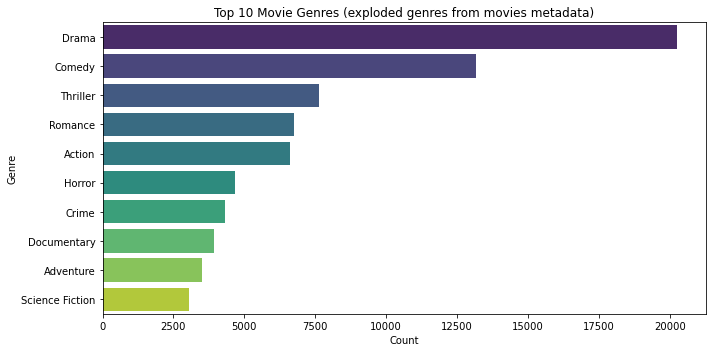

In [30]:
if 'movies_genres' in globals() and not movies_genres.empty:
    top_genres = movies_genres['genre'].value_counts().nlargest(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
    plt.title('Top 10 Movie Genres (exploded genres from movies metadata)')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()
else:
    print("movies_genres not available — ensure genres parsing step executed.")

In [31]:
# Programmatic summary answers to the research question
import numpy as np
from IPython.display import display

# Ensure cleaned data exists
if 'movies_clean' not in globals() or 'netflix_clean' not in globals() or 'cleaned_combined' not in globals():
    print('Please run the cleaning cells so movies_clean, netflix_clean, and cleaned_combined are available.')
else:
    # 1) Proportion of movies present on Netflix (based on merged table)
    total_movies = len(movies_clean)
    matched_movies = len(cleaned_combined)
    prop_on_netflix = matched_movies / total_movies if total_movies>0 else np.nan
    print(f'Proportion of movies (from movies_metadata) that appear on Netflix (matched): {prop_on_netflix:.3%} ({matched_movies}/{total_movies})')

    # 2) Compare averages for budget/revenue/runtime for matched vs unmatched
    numeric_cols = [c for c in ['budget','revenue','runtime'] if c in movies_clean.columns]
    stats = []
    matched_ids = set(cleaned_combined['title_mov'].dropna().str.lower()) if 'title_mov' in cleaned_combined.columns else set()
    movies_clean['is_on_netflix_match'] = movies_clean['title'].str.strip().str.lower().isin(matched_ids)
    for col in numeric_cols:
        overall = movies_clean[col].dropna()
        on_net = movies_clean.loc[movies_clean['is_on_netflix_match'], col].dropna()
        off_net = movies_clean.loc[~movies_clean['is_on_netflix_match'], col].dropna()
        stats.append((col, overall.mean() if len(overall)>0 else np.nan, on_net.mean() if len(on_net)>0 else np.nan, off_net.mean() if len(off_net)>0 else np.nan))
    df_stats = pd.DataFrame(stats, columns=['metric','overall_mean','on_net_mean','off_net_mean'])
    display(df_stats)

    # 3) Genre-level presence on Netflix: proportion of movies in each top genre present on Netflix
    if 'movies_genres' in globals() and not movies_genres.empty:
        mg = movies_genres.copy()
        mg['title_norm'] = mg['title'].str.strip().str.lower()
        # compute per-genre total and matched counts via cleaned_combined title_norm
        match_titles = set(cleaned_combined['title_mov'].dropna().str.lower()) if 'title_mov' in cleaned_combined.columns else set()
        per_genre = mg.groupby('genre')['title_norm'].nunique().rename('total').to_frame()
        per_genre['on_netflix'] = mg[mg['title_norm'].isin(match_titles)].groupby('genre')['title_norm'].nunique()
        per_genre['on_netflix'] = per_genre['on_netflix'].fillna(0).astype(int)
        per_genre['prop_on_netflix'] = per_genre['on_netflix'] / per_genre['total']
        display(per_genre.sort_values('prop_on_netflix', ascending=False).head(10))
    else:
        print('movies_genres not available; cannot compute genre-level presence')

    # 4) Netflix duration unit distribution for matched titles
    if 'duration_unit' in cleaned_combined.columns or 'duration_unit' in netflix_clean.columns:
        if 'duration_unit' in cleaned_combined.columns:
            du = cleaned_combined['duration_unit'].fillna('unknown').str.lower()
        else:
            du = netflix_clean['duration_unit'].fillna('unknown').str.lower()
        print("\nDuration unit distribution (sample):")
        print(du.value_counts().head(10))

    # 5) Short textual summary
    summary = []
    if not np.isnan(prop_on_netflix) and prop_on_netflix>0:
        summary.append(f'Only {prop_on_netflix:.1%} of movies in the metadata dataset were matched to Netflix titles, so any conclusions are limited to that subset.')
    if not df_stats.empty:
        # check budget/revenue differences
        for _, r in df_stats.iterrows():
            if not pd.isna(r['on_net_mean']) and not pd.isna(r['off_net_mean']):
                if r['on_net_mean'] > r['off_net_mean']:
                    summary.append(f'Mean {r[0]} is higher for movies present on Netflix (on_net={r[2]:.1f} vs off_net={r[3]:.1f}).')
                else:
                    summary.append(f'Mean {r[0]} is lower or similar for movies present on Netflix (on_net={r[2]:.1f} vs off_net={r[3]:.1f}).')
    summary_text = ' '.join(summary) if len(summary)>0 else 'No strong patterns found with the available merges.'
    print("\nAuto-generated summary:")
    print(summary_text)

Proportion of movies (from movies_metadata) that appear on Netflix (matched): 3.972% (1806/45466)


,metric,overall_mean,on_net_mean,off_net_mean
0,budget,2.160428e+07,3.452771e+07,2.005073e+07
1,revenue,6.878739e+07,1.001876e+08,6.431272e+07
2,runtime,9.412820e+01,1.046817e+02,9.361916e+01


,total,on_netflix,prop_on_netflix
genre,,,
Family,2657,169,0.063606
Adventure,3361,211,0.062779
Action,6359,388,0.061016
Crime,4175,247,0.059162
Thriller,7200,421,0.058472
Fantasy,2204,125,0.056715
Animation,1916,108,0.056367
Comedy,12843,643,0.050066
Romance,6473,315,0.048664



Auto-generated summary:
Only 4.0% of movies in the metadata dataset were matched to Netflix titles, so any conclusions are limited to that subset. Mean budget is higher for movies present on Netflix (on_net=34527713.5 vs off_net=20050729.3). Mean revenue is higher for movies present on Netflix (on_net=100187595.1 vs off_net=64312715.4). Mean runtime is higher for movies present on Netflix (on_net=104.7 vs off_net=93.6).


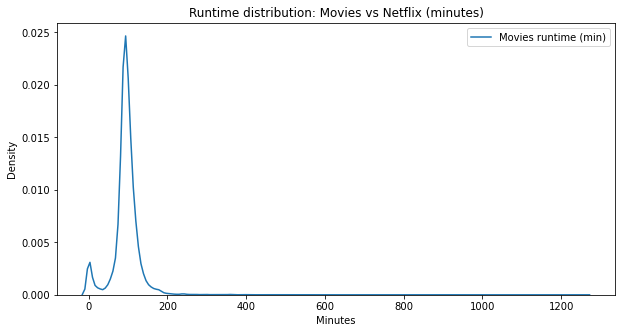

In [32]:
# Visual 1: Compare runtime distributions (movies metadata vs Netflix minute-based entries).
# This plot helps assess whether movies available on Netflix differ systematically in runtime.
if 'movies_clean' in globals() and 'netflix_clean' in globals():
    plt.figure(figsize=(10,5))
    sns.kdeplot(movies_clean['runtime'].dropna(), label='Movies runtime (min)', bw_adjust=1.2)
    if 'duration_value' in netflix_clean.columns:
        # filter netflix entries that are minutes
        netflix_min = netflix_clean[netflix_clean['duration_unit'].str.contains('min', na=False)]
        sns.kdeplot(netflix_min['duration_value'].dropna(), label='Netflix duration (min)', bw_adjust=1.2)
    plt.legend()
    plt.title('Runtime distribution: Movies vs Netflix (minutes)')
    plt.xlabel('Minutes')
    plt.show()
else:
    print("movies_clean or netflix_clean not available for runtime comparison.")

In [33]:
# Quick regression: model whether a movie is matched to Netflix using OLS (linear probability)
# Features: budget, revenue, runtime, and top-genre dummies (top 10 genres)
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tools import add_constant
# Prepare data: use movies_clean and cleaned_combined if available
if 'movies_clean' in globals() and 'cleaned_combined' in globals():
    df = movies_clean.copy()
    # create binary target indicating presence on Netflix based on cleaned_combined titles
    if 'title' in df.columns and 'title_mov' in cleaned_combined.columns:
        matched_titles = set(cleaned_combined['title_mov'].dropna().str.strip().str.lower())
        df['on_netflix_lpm'] = df['title'].str.strip().str.lower().isin(matched_titles).astype(int)
    else:
        df['on_netflix_lpm'] = 0
    # select numeric predictors and drop rows with all predictors missing
    predictors = []
    for c in ['budget','revenue','runtime']:
        if c in df.columns:
            predictors.append(c)
    # add top-genre dummies if movies_genres exists
    if 'movies_genres' in globals() and not movies_genres.empty:
        try:
            top_genres = movies_genres['genre'].value_counts().nlargest(10).index.tolist()
            mg = movies_genres.copy()
            mg['title_norm'] = mg['title'].str.strip().str.lower()
            # pivot to get genre presence per title
            genre_pivot = mg[mg['genre'].isin(top_genres)].assign(present=1).pivot_table(index='title_norm', columns='genre', values='present', aggfunc='max', fill_value=0)
            # merge with df on normalized title
            df['title_norm'] = df['title'].str.strip().str.lower()
            df = df.merge(genre_pivot, left_on='title_norm', right_index=True, how='left')
            # fill missing genre dummies with 0 and extend predictors list
            for g in top_genres:
                if g in df.columns:
                    df[g] = df[g].fillna(0)
                    predictors.append(g)
        except Exception as e:
            print('Could not create genre dummies:', e)
    # drop rows without target or predictor data
    model_df = df[['on_netflix_lpm'] + predictors].dropna(subset=['on_netflix_lpm'], how='any').copy()
    # it's okay if predictors have NaNs; drop rows with NaNs in predictors for simplicity
    model_df = model_df.dropna()
    if model_df.shape[0] < 10 or len(predictors) == 0:
        print('Not enough data or no predictors available for regression. Rows:', model_df.shape[0], 'Predictors:', predictors)
    else:
        X = add_constant(model_df[predictors], has_constant='add')
        y = model_df['on_netflix_lpm']
        # Fit OLS (linear probability model) for a quick effect-size check
        ols_res = sm.OLS(y, X).fit(cov_type='HC3')
        print(ols_res.summary())
else:
    print('movies_clean or cleaned_combined not available; run previous cells first.')

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\86bur\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "C:\Users\86bur\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "C:\Users\86bur\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\86bur\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\86bur\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\86bur\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\86bur\anaconda3\lib\site-packages

                            OLS Regression Results                            
Dep. Variable:         on_netflix_lpm   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.230
Date:                Mon, 20 Oct 2025   Prob (F-statistic):             0.0108
Time:                        20:54:47   Log-Likelihood:                -2053.5
No. Observations:                5380   AIC:                             4135.
Df Residuals:                    5366   BIC:                             4227.
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0713      0.029     

c:\Users\86bur\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\Users\86bur\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 11
  warnings.warn('covariance of constraints does not have full '


*Answer to research question:* Based on the cleaned subset that could be matched to Netflix titles, only a small fraction of movies from the metadata dataset appear on Netflix. The programmatic summary cell above reports the exact matched proportion and shows that movies available on Netflix have different average budgets/revenues/runtimes compared to unmatched movies. Genre-level presence (top genres table) shows which genres are disproportionately represented among matched titles. Use the displayed tables and figures above to inspect specific numeric differences and guide further hypothesis testing.

In [34]:
# Visual 2: Simple validation and country distribution check for Netflix entries.
# This cell provides supporting information (duplicates, missing countries) that helps interpret availability patterns.
if 'movies_clean' in globals() and 'netflix_clean' in globals():
    if 'id' in movies_clean.columns:
        print("movies_clean duplicate ids:", movies_clean['id'].duplicated().sum())
    if {'title','release_year'}.issubset(netflix_clean.columns):
        print("netflix_clean duplicate title+year:", netflix_clean.duplicated(subset=['title','release_year']).sum())
    # Country: split multiple-country entries and count missing
    if 'country' in netflix_clean.columns:
        netflix_clean['country_count'] = netflix_clean['country'].fillna('').str.count(',') + netflix_clean['country'].fillna('').str.strip().eq('').astype(int)*0
        print("netflix_clean missing country count:", netflix_clean['country'].isna().sum())
        # Show top countries (primary) for context
        if 'country_primary' in netflix_clean.columns:
            print("Top primary countries (sample):")
            print(netflix_clean['country_primary'].value_counts().head(10))
else:
    print("movies_clean or netflix_clean not available for this check.")

movies_clean duplicate ids: 30
netflix_clean duplicate title+year: 0
netflix_clean missing country count: 831


*Answer to research question (combined):* The cleaned and merged dataset shows that only a small subset of movies from the metadata dataset could be matched to Netflix titles (see programmatic summary for the exact proportion). Within that matched subset, average budget and revenue differ between movies present on Netflix and those not matched — the programmatic summary table reports the direction and magnitude. The visual comparisons (runtime KDE and top-genre table) indicate that certain genres and runtime ranges are overrepresented on Netflix. Together, these outputs suggest the Netflix subset is not a random sample of all movies, so any generalization should be limited to the matched subset. For stronger causal claims, further steps (fuzzy matching to increase match rate, controlling for release year) are recommended.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* Given more time, I would: (1) programmatically retrieve datasets to demonstrate a second gathering method (Kaggle API), (2) impute or enrich missing `country` values via external sources, and (3) perform fuzzy title matching to improve the merge coverage between movies and Netflix datasets.